In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from perceptron import Perceptron, Classifier
from matplotlib.colors import ListedColormap

In [2]:
iris_data = pd.read_csv("Data/iris_data.txt", header=None, encoding="UTF-8")

In [3]:
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Prepare training data
X = iris_data.iloc[0:100, [0, 2]].values
y = iris_data.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)

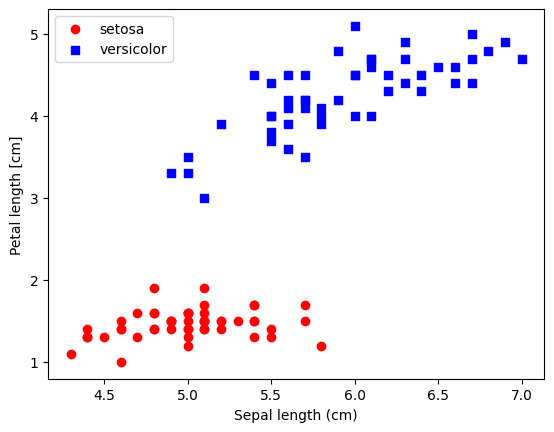

In [14]:
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:, 0], X[50:, 1], color="blue", marker="s", label="versicolor")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

In [4]:
learning_rate = 0.1
n_iter = 10
ppn = Perceptron(learning_rate=learning_rate, n_iter=n_iter)
ppn.fit(X, y)

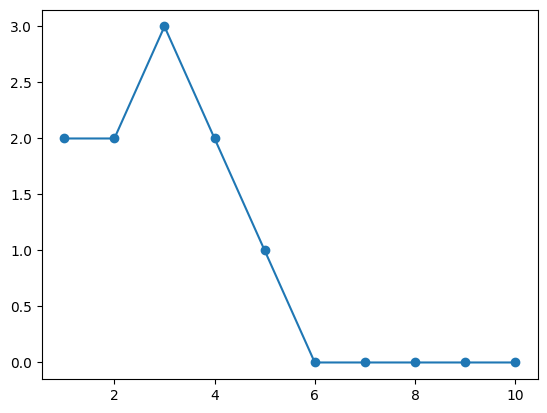

In [5]:
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker="o")
plt.show()

In [11]:
# Plot decision boundary


def plot_decision_regions(
    X: np.ndarray, y: np.ndarray, classifier: Classifier, resolution: float = 0.02
):
    markers = ("o", "s", "^", "v", "<")
    colors = ["red", "blue", "lightgreen", "gray", "cyan"]
    colormap = ListedColormap(colors[: len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)
    )
    labels = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    labels = labels.reshape(xx1.shape)
    plt.contourf(xx1, xx2, labels, alpha=0.3, cmap=colormap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f"Class {cl}",
            edgecolor="black",
        )
    plt.show()

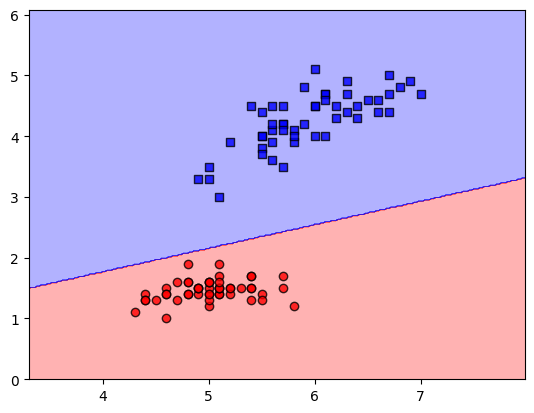

In [12]:
plot_decision_regions(X, y, ppn)